In [1]:
import cv2
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import calibrating_camera as cc

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Make a list of calibration images
fnames = glob.glob('camera_cal/calibration*.jpg')

In [3]:
#camera calibrating

#cols X rows of chessboard in this project
ptsn=(9,6)

objpoints,imgpoints,isize=cc.obj_img_pts(objp,fnames,ptsn)

#return and save mtx and dist to ./
comeraMatrix,distCoeffs = cc.Matrix_Coeffs(objpoints,imgpoints,isize)

NO CORNERS FOUND ON: calibration1.jpg
NO CORNERS FOUND ON: calibration5.jpg
NO CORNERS FOUND ON: calibration4.jpg
calibrating Camera is DONE!


In [4]:
#undistort and prespective transform chessboard,and save the results to output_images/
fnames = glob.glob('camera_cal/calibration*.jpg')

saveto='output_images/'

#images below from above a list of calibration images
for fname in fnames:
    img=cv2.imread(fname)
    
    #return chessboard images undistorted and prespective transformed,and save the transform matrix
    undist_chessboard,warped_chessboard,M_chessboard=cc.corners_unwarp(img,9,6,comeraMatrix,distCoeffs)
    
    if warped_chessboard is not None:
        
        srcstr=fname.split('/')[-1].split('.')
        srcname=srcstr[0]
        srcext=srcstr[1]
        #undistorted chessboard images names with _undistorted
        tosave_undistorted=srcname+'_undistorted.'+srcext
        #names of chessboard images applyed with perspective transform with _warped
        tosave_warped=srcname+'_warped.'+srcext
        
        cv2.imwrite(saveto+tosave_undistorted,undist_chessboard)
        cv2.imwrite(saveto+tosave_warped,warped_chessboard)
        
        pickle.dump(M_chessboard,open('./M_chessboard.pickle','wb'))

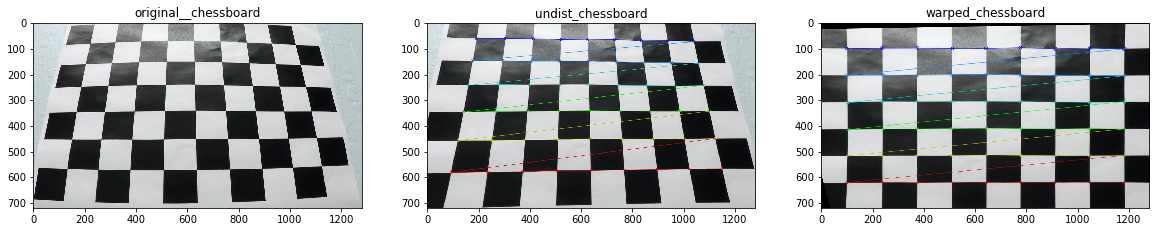

In [6]:
original__chessboard = cv2.imread('camera_cal/calibration3.jpg')
undist_chessboard = cv2.imread('output_images/calibration3_undistorted.jpg')
warped_chessboard = cv2.imread('output_images/calibration3_warped.jpg')

f, axs = plt.subplots(1, 3, figsize=(20,10))

axs[0].set_title('original__chessboard')
axs[0].imshow(original__chessboard)

axs[1].set_title('undist_chessboard')
axs[1].imshow(undist_chessboard)

axs[2].set_title('warped_chessboard')
axs[2].imshow(warped_chessboard)

plt.show()

In [7]:
#define the source points for prespective transform of road images
srcpts = np.float32([
            [200,  720], 
            [1100, 720], 
            [595,  450], 
            [685,  450]]
                    )
    
#define the destination points for prespective transform of road images                ) 
dstpts = np.float32(
            [[300, 720], 
             [980, 720], 
             [300, -1020], #-720
             [980, -1020]] #-720
                    ) 

M = cv2.getPerspectiveTransform(srcpts, dstpts)
Minv=cv2.getPerspectiveTransform(dstpts, srcpts)

pickle.dump(M,open('./M.pickle','wb'))
pickle.dump(Minv,open('./Minv.pickle','wb'))

In [2]:
# Import everything needed to edit/save/watch video clips
from IPython.display import HTML
from preproc_images import *
from line_fit_video import *

In [3]:
#read the test images
fnames = glob.glob('snapshot/*.jpg')
test_images={}
for fname in fnames:
    srcstr=fname.split('/')[-1]
    image = cv2.imread(fname)
    test_images[srcstr]= image

(738, 1280) 0 255


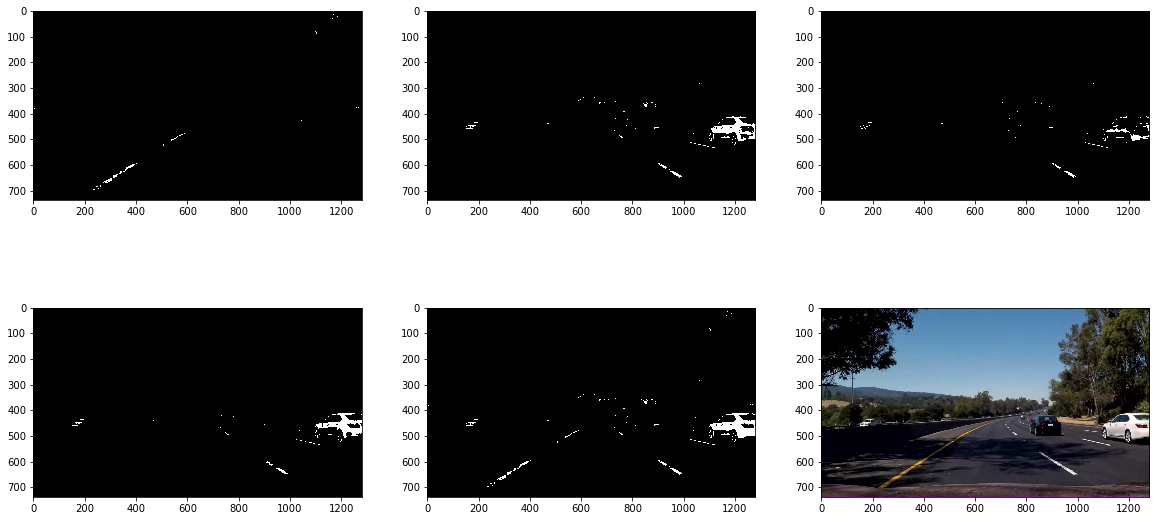

In [7]:
image = cv2.cvtColor(test_images['snapshot3.jpg'], cv2.COLOR_BGR2RGB)

yellow_white_layer, yellow, white_1, white_2, white_3 = yellow_white(image)

print(yellow_white_layer.shape, np.min(yellow_white_layer), np.max(yellow_white_layer))

f, axs = plt.subplots(2, 3, figsize = (20, 10))

axs[0][0].imshow(yellow, cmap = 'gray')
axs[0][1].imshow(white_1, cmap = 'gray')
axs[0][2].imshow(white_2, cmap = 'gray')
axs[1][0].imshow(white_3, cmap = 'gray')
axs[1][1].imshow(yellow_white_layer, cmap = 'gray')
axs[1][2].imshow(image)

plt.show()

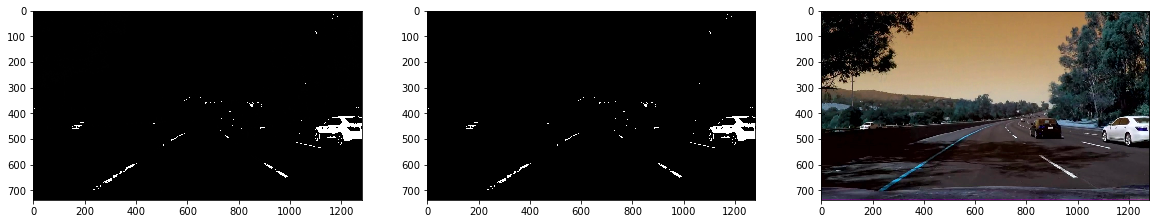

In [9]:
image2 = cv2.cvtColor(test_images['snapshot3.jpg'], cv2.COLOR_BGR2RGB)
combined_binary, abs_binary, dir_binary, mag_binary, mag_a_dir_binary, yellow_white_layer, color_binary = color_gradient(image2)

f, axs = plt.subplots(1, 3, figsize = (20, 10))
axs[0].imshow(combined_binary, cmap = 'gray')
axs[1].imshow(yellow_white_layer, cmap = 'gray')
axs[2].imshow(test_images['snapshot3.jpg'])
plt.show()

In [9]:
#test sobel,hls thresh function on test images
#all results will be saved to output_images/
saveto='output_images/'

for name in test_images.keys():
    img=test_images[name]
    src=np.copy(img)
    combined_binary, abs_binary, dir_binary, mag_binary, mag_a_dir_binary, HLS_binary, color_binary = color_gradient(img)
    
    strs=name.split('.')
    
    tosaveCombined_binary=strs[0]+'_combined_binary.'+strs[1]
    tosaveabsSobel_binary=strs[0]+'_abs_sobel_binary.'+strs[1]
    tosavedirSobel_binary=strs[0]+'_dir_sobel_binary.'+strs[1]    
    tosavemagSobel_binary=strs[0]+'_mag_sobel_binary.'+strs[1]
    tosavemagadirSobel_binary=strs[0]+'_mag_a_dir_binary.'+strs[1]
    tosaveHLS_binary=strs[0]+'_HLS_binary.'+strs[1]    
    tosaveColor_binary=strs[0]+'_color_binary.'+strs[1]
    
    cv2.imwrite(saveto+tosaveCombined_binary,combined_binary)
    cv2.imwrite(saveto+tosaveabsSobel_binary,abs_binary)
    cv2.imwrite(saveto+tosavedirSobel_binary,dir_binary)
    cv2.imwrite(saveto+tosavemagSobel_binary,mag_binary)
    cv2.imwrite(saveto+tosavemagSobel_binary,mag_a_dir_binary)    
    cv2.imwrite(saveto+tosaveHLS_binary,HLS_binary)
    cv2.imwrite(saveto+tosaveColor_binary,color_binary)

In [5]:
#test line fit functions on test images
#all results will be saved to output_images/
saveto='output_images/'

for name in test_images.keys():
    img = test_images[name]
    src = np.copy(img)
        
    undisted, warped, combined_binary, roi_combined_binary = preproc_images(src,comeraMatrix,distCoeffs,M)
    
    h,w = warped.shape  
    histogram_cfg = (h//2,h,0,w)
    curverad_cfg = (h,30/720,3.7/700)    
    
    fits,windows_warped,nonzeroy,nonzerox = lines_fits(warped,undisted,Minv, left_line, right_line, histogram_cfg,windows_cfg,curverad_cfg)
    curverads, detected = lines_cr(warped,fits, left_line, right_line, curverad_cfg, detected)
    offset_vehicle = offset_v(warped,fits,curverad_cfg)
    fits_warped, out_img_fit = viz_fits(warped,nonzerox,nonzeroy,fits,windows_cfg)
    output = final_output(warped,undisted,fits,Minv,curverads,offset_vehicle)
    
    strs = name.split('.')
    
    tosaveWarped=strs[0]+'_warped.'+strs[1]
    tosaveUndisted=strs[0]+'_undisted.'+strs[1]    
    tosaveWindows_warped=strs[0]+'_windows_warped.'+strs[1]
    tosaveFits_warped=strs[0]+'_fits_warped.'+strs[1]
    tosaveOutput=strs[0]+'_output.'+strs[1]
    
    cv2.imwrite(saveto+tosaveWarped,warped)
    cv2.imwrite(saveto+tosaveUndisted,undisted)
    cv2.imwrite(saveto+tosaveWindows_warped,windows_warped)
    cv2.imwrite(saveto+tosaveFits_warped,fits_warped)
    cv2.imwrite(saveto+tosaveOutput,output)

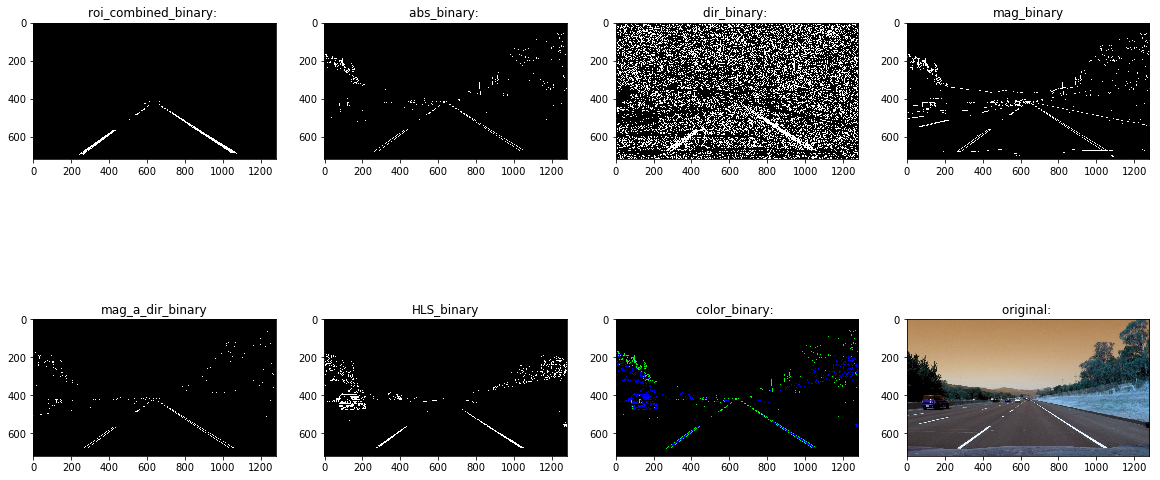

In [6]:
#visualization of above operation on last test image
f, axs = plt.subplots(2, 4, figsize=(20,10))

axs[0][0].set_title('roi_combined_binary: ')
axs[0][0].imshow(roi_combined_binary, cmap = 'gray')

axs[0][1].set_title('abs_binary: ')
axs[0][1].imshow(abs_binary,cmap = 'gray')

axs[0][2].set_title('dir_binary: ')
axs[0][2].imshow(dir_binary, cmap= 'gray')

axs[0][3].set_title('mag_binary')
axs[0][3].imshow(mag_binary, cmap = 'gray')

axs[1][0].set_title('mag_a_dir_binary')
axs[1][0].imshow(mag_a_dir_binary, cmap = 'gray')
       
axs[1][1].set_title('HLS_binary')
axs[1][1].imshow(HLS_binary, cmap = 'gray')

axs[1][2].set_title('color_binary: ')
axs[1][2].imshow(color_binary)

axs[1][3].set_title('original: ')
axs[1][3].imshow(img)

plt.show()

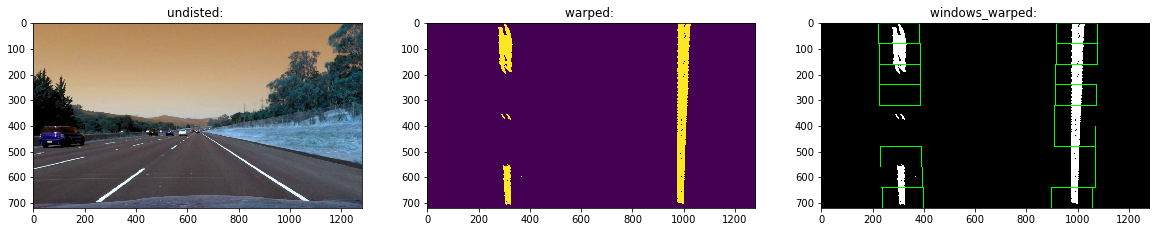

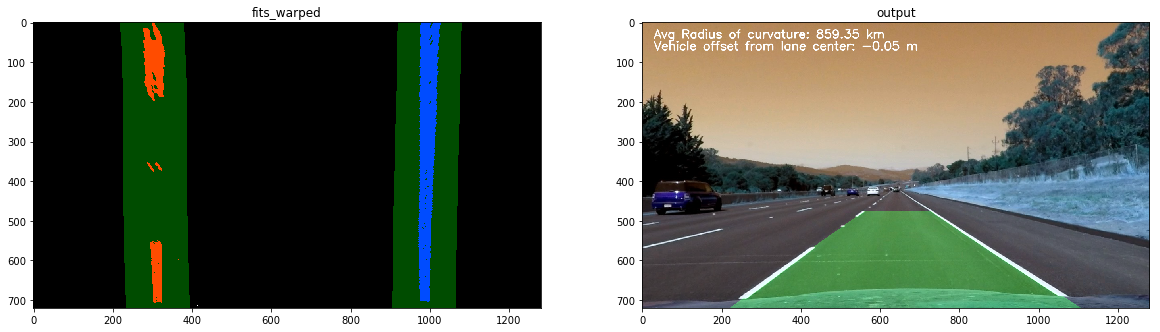

In [7]:
#visualization of above operation on last test image
f, axs = plt.subplots(1, 3, figsize=(20,10))

axs[0].set_title('undisted: ')
axs[0].imshow(undisted,cmap = 'gray')

axs[1].set_title('warped: ')
axs[1].imshow(warped)

axs[2].set_title('windows_warped: ')
axs[2].imshow(windows_warped)

plt.show()
f, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].set_title('fits_warped')
axs[0].imshow(fits_warped)

axs[1].set_title('output')
axs[1].imshow(output)

plt.show()

In [4]:
line_fit_video_proc('challenge_video.mp4','challenge_video_test2.mp4')

[MoviePy] >>>> Building video challenge_video_test2.mp4
[MoviePy] Writing video challenge_video_test2.mp4


100%|██████████| 600/600 [03:26<00:00,  2.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_test2.mp4 



In [5]:
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format('challenge_video_test2.mp4'))

In [1]:
import cv2
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import calibrating_camera as cc

In [2]:
# Import everything needed to edit/save/watch video clips
from IPython.display import HTML
from preproc_images import *
from line_fit_video import *

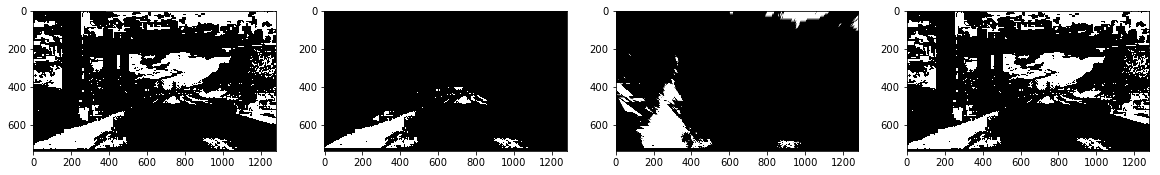

In [3]:
with open('./calibrateCamera.pickle','rb') as caf:
    calibrateCamera = pickle.load(caf)
comeraMatrix = calibrateCamera['comeraMatrix']
distCoeffs = calibrateCamera['distCoeffs']

with open('./M.pickle','rb') as mmf:
    M = pickle.load(mmf)
with open('./Minv.pickle','rb') as mmf:
    Minv = pickle.load(mmf)

challenge_video_snapshot = cv2.imread('challenge_video_snapshot.jpg')
challenge_video_snapshot = cv2.cvtColor(challenge_video_snapshot, cv2.COLOR_BGR2RGB)
undisted, warped, combined_binary, roi_combined_binary, HSL_binary = preproc_images(challenge_video_snapshot, comeraMatrix,distCoeffs,M)

f, axs = plt.subplots(1, 4, figsize = (20, 10))
axs[0].imshow(combined_binary, cmap = 'gray')
axs[1].imshow(roi_combined_binary, cmap = 'gray')
axs[2].imshow(warped, cmap = 'gray')
axs[3].imshow(HSL_binary, cmap = 'gray')
plt.show()